In [1]:
####################################################################################

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

##########################################################
# kinshana river basin
# hydrabad=citynum(40)
#print(np.unique(rivnum_cropped))
unq_rivnum = [0, 13, 49, 63, 73, 115, 164, 210, 276, 320, 331, 381, 407, 436, 
              628, 818, 1153, 1158, 1193, 1212, 1222, 1487, 1490, 1501, 1530, 1541, 
              1545, 1552, 1565, 1582, 1593, 1608, 1615, 1617, 2188, 2193, 2198, 2203, 
              2214, 2229, 2243, 2268, 2277, 2285, 2293, 2308, 2325, 2330, 2336, 2355, 
              2368, 2378, 4236, 4237, 4337, 4432, 4433, 4500, 4534, 4666, 4667, 4697, 
              4698, 4811, 4812, 4855, 4893, 5022, 5023, 5024, 5069, 5113]

city_list = [40, 66, 287, 314, 475, 
             485, 708, 778, 852, 894, 
             1000, 1106, 1174, 1255, 1429,
             1493,  1758, ]
##########################################################

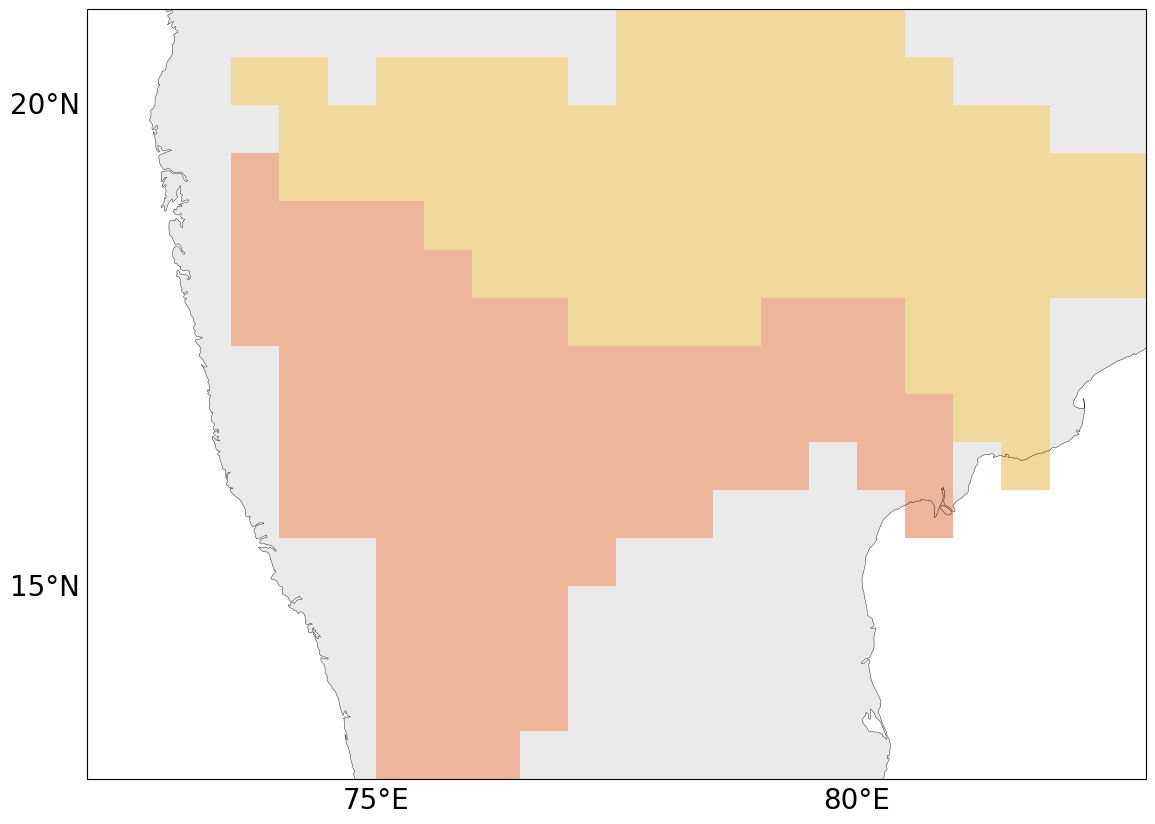

'\nrivnum_list in rivnum_cropped\nprint(np.unique(rivnum_cropped))\n[   0   13   49   63   73  115  164  210  276  320  331  381  407  436\n  628  818 1153 1158 1193 1212 1222 1487 1490 1501 1530 1541 1545 1552\n 1565 1582 1593 1608 1615 1617 2188 2193 2198 2203 2214 2229 2243 2268\n 2277 2285 2293 2308 2325 2330 2336 2355 2368 2378 4236 4237 4337 4432\n 4433 4500 4534 4666 4667 4697 4698 4811 4812 4855 4893 5022 5023 5024\n 5069 5113]\n '

In [9]:
# godavari =63
# krishna = 73

def geography(left, right, bottom, top):
    resolution = 2
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    img_extent = (left, right, bottom, top)
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
###########################################################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/pst'
left = 70
right = 85
bottom = 10
top = 25
lat_count = 360
lon_count = 720
main_rn = 49
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)

# riv
rivnum_path = f'{h08dir}/krishna_30arcmin/rivnum.WFDEI.hlf'
rivnum = np.fromfile(rivnum_path, dtype='float32').reshape(lat_count, lon_count) 
rivnum = rivnum.astype(int)
rivnum_cropped = rivnum[upperindex:lowerindex, leftindex:rightindex]
main_rivnum = np.ma.masked_where(rivnum_cropped != 73, rivnum_cropped)
sub_rivnum = np.ma.masked_where(rivnum_cropped != 63, rivnum_cropped)
sub_rivnums = np.ma.masked_where((rivnum_cropped < 74) | (rivnum_cropped > 1000), rivnum_cropped)

# draw
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([left, right, bottom, top], projection)
rivnum_cmap = mcolors.ListedColormap(['#edb69b'])
subrivnum_cmap = mcolors.ListedColormap(['#f1d89c'])
river_cmap = mcolors.ListedColormap(['#57acff'])

bg = ax.imshow(main_rivnum, 
               alpha=1, transform=projection, extent=img_extent,
               cmap=rivnum_cmap,
              )
sg = ax.imshow(sub_rivnum, 
               alpha=1, transform=projection, extent=img_extent,
               cmap=subrivnum_cmap,
              )
"""
og = ax.imshow(sub_rivnums, 
               alpha=1, transform=projection, extent=img_extent,
               cmap=subrivnum_cmap,
              )
"""

ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea', zorder=-3)
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#ffffff', zorder=-1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3,edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4', zorder=-3)
ax.gridlines(visible=False)

west, east, south, north = 72, 83, 13, 21
ax.set_xlim(west, east)
ax.set_ylim(south, north)

gl = ax.gridlines(draw_labels=True, zorder=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(round(west/10)*10, east, 5))
gl.ylocator = mticker.FixedLocator(np.arange(round(south/10)*10, north, 5))
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False
gl.xlabel_style = {'size': 20, 'color': 'black'}
gl.ylabel_style = {'size': 20, 'color': 'black'}

ax.gridlines(visible=False)
ax.spines['geo'].set_visible(True)

plt.show()

"""
rivnum_list in rivnum_cropped
print(np.unique(rivnum_cropped))
[   0   13   49   63   73  115  164  210  276  320  331  381  407  436
  628  818 1153 1158 1193 1212 1222 1487 1490 1501 1530 1541 1545 1552
 1565 1582 1593 1608 1615 1617 2188 2193 2198 2203 2214 2229 2243 2268
 2277 2285 2293 2308 2325 2330 2336 2355 2368 2378 4236 4237 4337 4432
 4433 4500 4534 4666 4667 4697 4698 4811 4812 4855 4893 5022 5023 5024
 5069 5113]
 """

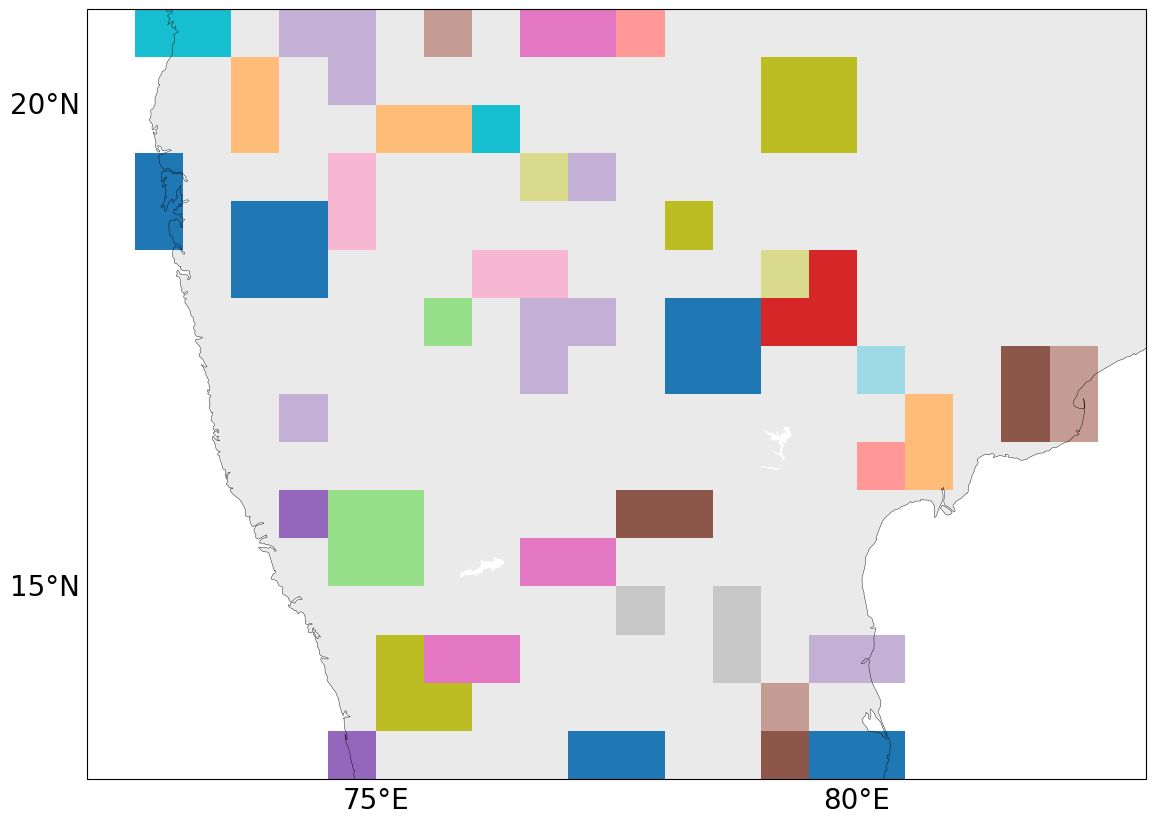

In [15]:
def geography(left, right, bottom, top):
    resolution = 2
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    img_extent = (left, right, bottom, top)
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
def l_coordinate_to_tuple(lcoordinate, a=360, b=720):
    lat_l = ((lcoordinate - 1) // b)
    lon_l = (lcoordinate) % b - 1
    return (lat_l, lon_l)

def nxtl2nxtxy(rgnfile, upperindex, leftindex):
    vfunc = np.vectorize(l_coordinate_to_tuple, otypes=[tuple])
    riv_nxtxy = np.empty(rgnfile.shape, dtype=tuple)
    mask = ~np.isnan(rgnfile)
    riv_nxtxy[mask] = vfunc(rgnfile[mask])
    riv_nxtxy_shape = (riv_nxtxy.shape[0], riv_nxtxy.shape[1], 2)
    
    riv_nxtxy_lst = []
    for row in riv_nxtxy:
        for y, x in row:
            modified_y = y - upperindex
            modified_x = x - leftindex
            riv_nxtxy_lst.append((modified_y, modified_x))

    riv_nxtxy_cropped = np.array(riv_nxtxy_lst).reshape(riv_nxtxy_shape)
    riv_nxtxy_cropped = riv_nxtxy_cropped.astype(int)
    return riv_nxtxy_cropped

def get_rivpath(riv_num, upperindex, lowerindex, leftindex, rightindex):
    """riv_num内の全riv_pathとriv_num外のriv_pathのすべてを表示する"""
    
    city_list = [40, 66, 287, 314, 475, 
                 485, 708, 778, 852, 894, 
                 1000, 1106, 1174, 1255, 1429,
                 1493,  1758, ]
    
    h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/pst'
    ynum = 360
    xnum = 720
    
    # rivnxl in xy coord
    rivnxl_path = f"{h08dir}/krishna_30arcmin/rivnxl.WFDEI.hlf"
    rivnxl = np.fromfile(rivnxl_path, 'float32').reshape(ynum, xnum)
    rivnxl_cropped = rivnxl[upperindex:lowerindex, leftindex:rightindex]
    riv_nxlonlat_cropped = nxtl2nxtxy(rivnxl_cropped, upperindex, leftindex)

    # rivara
    rivara_path = f"{h08dir}/krishna_30arcmin/rivara.WFDEI.hlf"
    rivara = np.fromfile(rivara_path, 'float32').reshape(ynum, xnum)
    rivara_cropped = rivara[upperindex:lowerindex, leftindex:rightindex]
    
    # rivnum
    rivnum_path = f'{h08dir}/krishna_30arcmin/rivnum.WFDEI.hlf'
    rivnum = np.fromfile(rivnum_path, dtype='float32').reshape(ynum, xnum) 
    rivnum = rivnum.astype(int)
    rivnum_cropped = rivnum[upperindex:lowerindex, leftindex:rightindex]

    # rivout
    rivout_path = f'{h08dir}/krishna_30arcmin/W5E5LR__20190000.hlf'
    rivout = np.fromfile(rivout_path, dtype='float32').reshape(ynum, xnum)
    rivout_cropped = rivout[upperindex:lowerindex, leftindex:rightindex]

    # city_numをkeyにしてprfまたはintの下流になるrivpathを保存
    rivpath_dict = {}

    # city loop
    for city_num in city_list:
        city_num_dict = {}
        coord_list = []
        
        # downstream exploration
        count = 0
        for srcd in coord_list:
            yyy = srcd[0]
            xxx = srcd[1]
            for y, x in zip(yyy, xxx):
                target_coord = (y, x) 
            
                path_coords = [target_coord]
                visited_coords = set()
                
                while True:
                    if target_coord in visited_coords:
                        break
                    visited_coords.add(target_coord)
                    target_row, target_col = target_coord
                    next_coord = riv_nxlonlat_cropped[target_row, target_col]
                    if next_coord.size == 0 or next_coord.shape != (2,):
                        break
                    target_coord = (next_coord[0], next_coord[1])
                    path_coords.append(target_coord)
                city_num_dict[count] = path_coords
                count += 1

        # upstream exploration
        for srcd in coord_list:
            yyy = srcd[0]
            xxx = srcd[1]
            for y, x in zip(yyy, xxx):
                target_coord = (y, x)
                
                path_coords = [target_coord]
                visited_coords = set()

                while True:
                    if target_coord in visited_coords:
                        break
                    visited_coords.add(target_coord)
                    matched_coords = np.argwhere(
                        np.all(target_coord == riv_nxlonlat_cropped, axis=2)
                    )
                    if len(matched_coords) == 0:
                        break
                    unvisited_matched = [
                        tuple(coord) for coord in matched_coords if tuple(coord) not in visited_coords
                    ]
                    if not unvisited_matched:
                        break
                    rivara_values = [
                        rivara_cropped[coord[0], coord[1]] for coord in unvisited_matched
                    ]
                    max_index = np.argmax(rivara_values)
                    best_coord = unvisited_matched[max_index]
                    target_coord = best_coord
                    path_coords.append(target_coord)
                city_num_dict[count] = path_coords
                count += 1
            
        # add dict
        rivpath_dict[city_num] = city_num_dict
    
    return rivpath_dict

def draw_mask_sotowaku(extent, mask_cropped, ax=None, sotowaku_color='#dc143c', linewidth=3):
    projection = ccrs.PlateCarree()
    delta = 360/720
    x_left = extent[0]
    y_top = extent[3]
    
    upper_indices = []
    lower_indices = []
    left_indices = []
    right_indices = []
    rows, cols = mask_cropped.shape
    for i in range(rows-1):
        for j in range(cols-1):
            if mask_cropped[i, j] != 0:
                if mask_cropped[i-1, j] == 0:
                    upper_indices.append((i, j))
                if mask_cropped[i+1, j] == 0:
                    lower_indices.append((i, j))
                if mask_cropped[i, j-1] == 0:
                    left_indices.append((i, j))
                if mask_cropped[i, j+1] == 0:
                    right_indices.append((i, j))

    for up in upper_indices:
        x_index = x_left + delta*(up[1])
        y_index = y_top - delta*(up[0])
        ax.plot([x_index, x_index+delta], [y_index, y_index], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=1) # top
    for lo in lower_indices:
        x_index = x_left + delta*(lo[1])
        y_index = y_top - delta*(lo[0]+1)
        ax.plot([x_index, x_index+delta], [y_index, y_index], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=1) # bottom
    for le in left_indices:
        x_index = x_left + delta*(le[1])
        y_index = y_top - delta*(le[0]+1)
        ax.plot([x_index, x_index], [y_index, y_index+delta], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=1) # left
    for ri in right_indices:
        x_index = x_left + delta*(ri[1]+1)
        y_index = y_top - delta*(ri[0]+1)
        ax.plot([x_index, x_index], [y_index, y_index+delta], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=1) # right

    return ax

    
def test():
    #
    key_index = 64
    left = 70
    right = 85
    bottom = 10
    top = 25
    #
    resolution=2
    nx, ny = (right - left)*resolution, (top - bottom)*resolution
    rgnshape = (ny, nx)
    img_extent = (left, right, bottom, top)
    extent = (-180, 180, -90, 90)
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    lat_count = 360
    lon_count = 720
    
    ###########################################################################################
    h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/pst'
    upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)

    # riv
    rivnum_path = f'{h08dir}/krishna_30arcmin/rivnum.WFDEI.hlf'
    rivnum = np.fromfile(rivnum_path, dtype='float32').reshape(lat_count, lon_count) 
    rivnum = rivnum.astype(int)
    rivnum_cropped = rivnum[upperindex:lowerindex, leftindex:rightindex]
    rivnum_masked = np.ma.masked_where(rivnum_cropped != riv_num, rivnum_cropped)
    
    # discharge
    rivout_path = f'{h08dir}/krishna_30arcmin/W5E5LR__20190000.hlf'
    rivout = np.fromfile(rivout_path, dtype='float32').reshape(lat_count, lon_count)
    rivout_cropped = rivout[upperindex:lowerindex, leftindex:rightindex] * 60 * 60 * 24 * 365 / 1000

    # rivnxl
    path_dict = get_rivpath(riv_num, upperindex, lowerindex, leftindex, rightindex)
    
    ###########################################################################################
    
    sub_rivnum_list = []
    
    ###########################################################################################
    
    # cmap
    rivnum_cmap = mcolors.ListedColormap(['#edb69b'])
    srivnum_cmap = mcolors.ListedColormap(['#f1d89c'])
    river_cmap = mcolors.ListedColormap(['#57acff'])

    # draw
    projection = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
    ax.set_extent([left, right, bottom, top], projection)

    # rivnxl
    width = 1
    city_list = [40, 66, 287, 314, 475, 
                 485, 708, 778, 852, 894, 
                 1000, 1106, 1174, 1255, 1429,
                 1493,  1758, ]
    for city_num in city_list:
        path_city_dict = path_dict[city_num]
        
        for key, path_coords in path_city_dict.items():
            
            #2つずつのペアに変換
            path_coords_lat = [coord[0] for coord in path_coords]
            path_coords_lon = [coord[1] for coord in path_coords]
            path_coords_pairs = list(zip(path_coords_lat, path_coords_lon))
            path_coords_grouped = [(path_coords_lat[i:i + 2], path_coords_lon[i:i + 2]) for i in range(len(path_coords) - 1)]
            
            for lat_coords, lon_coords in path_coords_grouped:
                # dischargeの取得
                discharge = rivout_cropped[lat_coords[0], lon_coords[0]]
                ###########################################################################################
                # discharge criteria
                ###########################################################################################
                if discharge > 1e10:
                    linewidth = 2.0
                elif 1e10 > discharge > 1e9:
                    linewidth = 1.2
                else:
                    linewidth = 0.4
                
                # lat_coordsとlon_coordsの変換
                lat_coords = [img_extent[3] - ((lat + (1/(width * 2)))*(1/12)) for lat in lat_coords]
                lon_coords = [(lon + (1/(width * 2)))*(1/12) + img_extent[0] for lon in lon_coords]
                
                # ax.plotを使ってプロット
                ax.plot(lon_coords, lat_coords, 
                        markersize=0, linewidth=linewidth, color='#57acff',
                        marker='o', linestyle='-', transform=projection, zorder=1
                       )

    # rivnum
    bg = ax.imshow(rivnum_masked, 
                   alpha=1, cmap=rivnum_cmap, transform=projection, extent=img_extent
                  )

    for srn in sub_rivnum_list:
        srivnum_masked = np.ma.masked_where(rivnum_cropped != srn, rivnum_cropped)
        ax.imshow(srivnum_masked, 
                  alpha=1, cmap=srivnum_cmap, transform=projection, extent=img_extent
                  )

    # city outer
    ctymsk_path = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/pst/krishna_30arcmin/city_clrd0000.hlf'
    citymask = np.fromfile(ctymsk_path, dtype='float32').reshape(lat_count, lon_count)
    citymask_cropped = citymask[upperindex:lowerindex, leftindex:rightindex]
    citymask_masked = np.ma.masked_where(citymask_cropped == 0, citymask_cropped)
    ax.imshow(citymask_masked, transform=projection, extent=img_extent, cmap='tab20')
    #for city_num in city_list:
        #draw_mask_sotowaku(img_extent, citymask_cropped, ax=ax, sotowaku_color='white', linewidth=1.5)
        
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea', zorder=-3)
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#ffffff')
    ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#ffffff', zorder=-1)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.3,edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4', zorder=-3)
    ax.gridlines(visible=False)

    west, east, south, north = 72, 83, 13, 21
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    
    gl = ax.gridlines(draw_labels=True, zorder=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(round(west/10)*10, east, 5))
    gl.ylocator = mticker.FixedLocator(np.arange(round(south/10)*10, north, 5))
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xlines = False
    gl.ylines = False
    gl.xlabel_style = {'size': 20, 'color': 'black'}
    gl.ylabel_style = {'size': 20, 'color': 'black'}
    
    ax.gridlines(visible=False)
    ax.spines['geo'].set_visible(True)
    
    plt.show()

test()